In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Simple models (part 2)


The linear growth model predicts unlimited growth as n gets larger if d is positive.

\begin{equation}
P_{n} = P_o + nd
\end{equation}

The exponential growth model predicts unlimited growth as n gets larger if r is larger than 1.

\begin{equation}
P_{n} = r^n P_o
\end{equation}



In [4]:
# Analytical models

x = np.linspace(0, 10, 100)   # independent variable

y = x      # linear model
y2 = x**2  # quadratic model
y3 = x**3  # cubic model
y2x = 2**x  # exponential model (base 2)
yexp = np.exp(x)  # exponential model (base e)

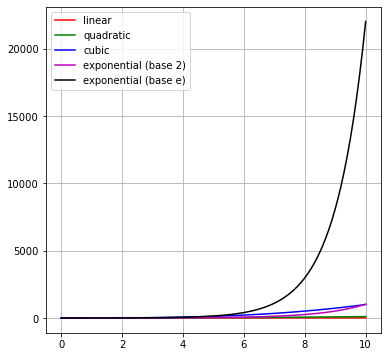

In [5]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x,y,    'r', label='linear')
ax.plot(x,y2,   'g', label='quadratic')
ax.plot(x,y3,   'b', label='cubic')
ax.plot(x,y2x,  'm',label='exponential (base 2)')
ax.plot(x,yexp, 'k', label='exponential (base e)')
ax.legend()
ax.grid()

Consider a population that grows according to the linear growth model:
    
\begin{equation}
P_{n+1} =  P_{n} + \Delta P
\end{equation}

where $\Delta P$ is the change in $P$ from one time step to another: 

\begin{equation}
P_{n+1} - P_{n} = \Delta P
\end{equation}

Define $\Delta t$ to be the time step, then one can define the *rate of change* of $P$ with respect to time:

\begin{equation}
\frac{\Delta P}{\Delta t} = r
\end{equation}

where $r$ is a constant growth rate

This model is discrete, which means it is only defined at integer values of $t$ and not in between. 

Sometimes a **continuous model** is more realistic, where the time intervals are _very_ small. This amounts to making $\Delta t$ become infinitesimally small, i.e. $\lim_{\Delta t\rightarrow 0}$:

\begin{equation}
\frac{dP}{dt} = r
\end{equation}

This is an example of a **differential equation**. 

This equation says that the rate of change is constant, i.e. the slope is constant and therefore the model is linear.


## Interest rates

Consider the following situation: given an initial amount $P_0$ of money, how much will it grow after $t$ years in a bank with annual interest rate $r$.  The answer is

\begin{equation}
P_t = P_0(1+r)^t
\end{equation}



If interest rate is compunded n times per year, then

\begin{equation}
P_t = P_{0}(1+\frac{r}{n})^{nt}
\end{equation}

If we do continuous compunding then that is equivalent to letting $n \rightarrow \infty$

\begin{equation}
\lim_{n\to\infty} (1+\frac{1}{n})^n \to e
\end{equation}

So,

\begin{equation}
P_t = P_0e^{rt}
\end{equation}


It is much easier to compute with interest rates in terms of a difference equation and then solve this equation on a computer.

The fundamental model for interest rates is that an amount $x_{n−1}$ at some point of time $t_{n−1}$ increases its value with growth rate $r$ to an amount $x_n$ at a new point of time $t_n$:


\begin{equation}
x_n = x_{n-1} +rx_{n-1}
\end{equation}

If you want to use percentage

\begin{equation}
x_n = x_{n-1} +\frac{p}{100}x_{n-1}
\end{equation}

where $p$ is given as a percent value.

In [6]:
x0 = 100                      # initial amount
p = 5                         # interest rate in %
N = 20                        # number of years
tn = np.arange(N)
x = np.zeros(N)

In [7]:
tn

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [8]:
# Compute solution
x[0] = x0
for n in tn[1:]:
    x[n] = x[n-1] + (p/100.0)*x[n-1]  # convert % to fraction
    
print(x[1])  # after 1 year

105.0


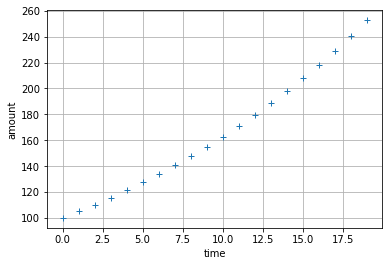

In [9]:
fig, ax = plt.subplots()
ax.plot(tn, x, '+')
ax.set_ylabel('amount')
ax.set_xlabel('time')
ax.grid()
#plt.savefig('discrete.png')

In [6]:
x0 = 100                      # initial amount
p = 5                         # interest rate
r = p/365.0                   # daily interest rate

In [7]:
# Calculate number of days in 20 years
# Let's use datetime

import datetime
date1 = datetime.date(2020, 1, 1)
date2 = datetime.date(2040, 1, 1)
diff = date2 - date1
N = diff.days                 # Number of days
print('N days: ',N)

tn = np.arange(N)
x = np.zeros(N)

N days:  7305


In [8]:
# Compute solution
x[0] = x0
for n in tn[1:]:
    x[n] = x[n-1] + (r/100.0)*x[n-1]
    
print(x[364])  # after 1 year

105.11235069459615


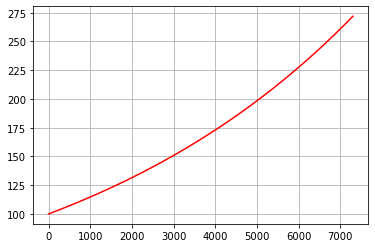

In [9]:
fig, ax = plt.subplots()
ax.plot(tn, x, 'r')
ax.grid()

#### Difference equation for population growth (again)

Let $x_{n−1}$ be the number of individuals in a population at time $t_{n−1}$. The population can consists of humans, animals, cells, or whatever objects where the number of births and deaths is proportional to the number of individuals.

Between time levels $t_{n−1}$ and $t_{n}$, $bx_{n−1}$ individuals are born, and $dx_{n−1}$ individuals die, where $b$ and $d$ are constants. The net growth of the population is then $(b − d)x_n$. 

Introducing $r' = (b − d)100$ for the net growth factor (measured in percent), the new number of individuals become


\begin{equation}
x_n = x_{n-1} +\frac{r'}{100}x_{n-1}
\end{equation}

This is the same difference equation (or recurrence relation) as the compound interest equation. It models growth of populations quite well as long as there are optimal growing conditions for each individual.

To solve the equation above we need to start out with a known size $x_0$ of the population and $r$ parameter. Recall that the equation above can also be written as follows (functional form):

\begin{equation}
x_{n} = x_0 (1+r')^n 
\end{equation}



In [24]:
# Example: Rabbits

N0 = 10
r = 0.3
tot_t = 21
t = np.arange(tot_t)  # time array

N = np.zeros(tot_t)   # population
Nf = np.zeros(tot_t)  # functional

# Initial conditions
N[0] = N0
Nf[0] = N0

In [20]:
# Compare two formulations:

# Recurrence
for i in range(1, tot_t):
    N[i] = N[i-1] + r*N[i-1]

# Functional
for i in range(1, tot_t):
    Nf[i] = N0 * (1 + r)**i
    
for i in range(tot_t):
    print(f'{N[i]:.2f}, {Nf[i]:.2f}')

10.00, 10.00
13.00, 13.00
16.90, 16.90
21.97, 21.97
28.56, 28.56
37.13, 37.13
48.27, 48.27
62.75, 62.75
81.57, 81.57
106.04, 106.04
137.86, 137.86
179.22, 179.22
232.98, 232.98
302.88, 302.88
393.74, 393.74
511.86, 511.86
665.42, 665.42
865.04, 865.04
1124.55, 1124.55
1461.92, 1461.92
1900.50, 1900.50


Now, suppose we have a population , $N$, that varies in time. So, it is a function of $t$. Call it $N(t)$. If we observe geometric growth, then the rate of change of $N$ with respect to time can be written as

\begin{equation}
\frac{dN}{dt} = rN
\end{equation}

This equation says that the rate of change of the population is **proportional** to the population. It makes sense, right?

Solution of this **differential equation** is:

\begin{equation}
N(t)= N_0 e^{rt}
\end{equation}

where $N_0$ is the population when $t=0$, i.e. $N(0)=N_0$.

---

**Example:**

Given a differential equation

\begin{equation}
\frac{dN(t)}{dt} = 0.4 N(t)
\end{equation}

with initial condition $N_0 = 100$, its solution is


\begin{equation}
N(t) = 100e^{0.4t}
\end{equation}


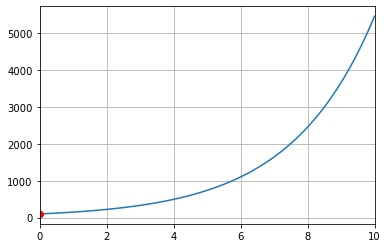

In [25]:
# Visualization

N0 = 100
r = 0.4

t = np.linspace(0, 10, 100)  # a vector of time values

Nexp = N0*np.exp(r*t)  # solution is also a vector

fig, ax = plt.subplots()
ax.plot(t, Nexp)
ax.plot([0],[N0],'ro')  # plot initial condition
ax.set_xlim(0, 10)
ax.grid()

### Using Scipy

In [9]:
import scipy.integrate as sci

In [12]:
def dy_dt(y, t):
    """Define ODE dy/dt = 0.4y"""
    return 0.4*y

In [13]:
y0 = 100                      # initial condition
t = np.linspace(0, 10, 100)   # t >= 0 

In [12]:
y = sci.odeint(dy_dt, y0, t)   # using ODEINT to integrate ODE

In [14]:
y_a = 100*np.exp(0.4*t)      # exact solution

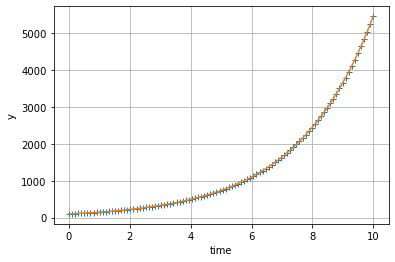

In [27]:
fig, ax = plt.subplots()
ax.plot(t, y, '+', t, y_a)
ax.set_ylabel('y')
ax.set_xlabel('time')
ax.grid()

---

**Example:**

Given a differential equation

\begin{equation}
\frac{dy(t)}{dt} + y(t) = t
\end{equation}

with initial condition $y_0 = 2.0$, its solution is


\begin{equation}
y(t) = 3e^{-t} + t -1
\end{equation}


In [13]:
def dy_dt(y, t):
    """Define ODE dy/dt = t - y"""
    return t - y

In [14]:
y0 = 2.0                   # initial condition
t = np.arange(0, 5, 0.1)   # t >= 0 

In [15]:
import scipy.integrate as sci
y = sci.odeint(dy_dt, y0, t)   # using ODEINT to integrate ODE

In [16]:
y_a = 3*np.exp(-t) + t - 1    # exact solution with y0 = 2

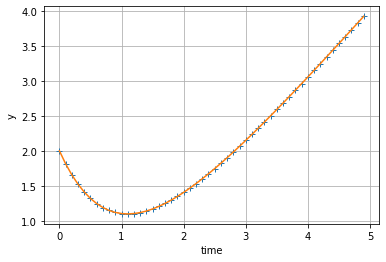

In [17]:
fig, ax = plt.subplots()
ax.plot(t, y, '+', t, y_a)
ax.set_ylabel('y')
ax.set_xlabel('time')
ax.grid()

## Population growth (again)

---

__Thomas Malthus: British cleric, writer and scholar__

*An Essay on the Principle of Population* (1798)



Argued that 

* populations tend to increase more rapidly than food supply (geometric vs arithmetic growth respectively)
* need **checks** to hold population within resource limits
    * positive checks: famine, war, epidemics
    * preventive checks: birth control, celibacy

---

Malthus: environment cannot support an *infinite* population. There are limits!

__Pierre Verhulst: Belgian mathematician__

*Logistic model* ca. 1838

This has many applications - not just population growth!

Modify

\begin{equation}
\frac{dN}{dt} = \lambda N 
\end{equation}

When $N << K$ (no constraints!), then $K=1$.

When $N \approx K$ (limits!), then rate of change should be close to zero.

\begin{equation}
\frac{dN}{dt} = \lambda N(1-\frac{N}{K})
\end{equation}


Let us examine this solution in more detail to understand its behavior. 

For small population levels, when $N$ is much smaller than $K$, $N$ exhibits exponential like growth, as dictated by the $\lambda$ parameter, which is the growth rate. This is because the $(1−\frac{N}{K})$ term is still relatively close to $1$. However, as $N$ becomes larger, this last term starts to matter because it approaches zero. As $N(t)$ attains this point, the growth given by $dN/dt$ dies out and the population levels top off asymptotically at $K$. 

This asymptotical level $K$ is known as the saturation point or the **carrying capacity** of the population.

Solution of the logistic model describes how a population evolves over time. The solution is called the *logistic function*:

\begin{equation}
N(t) = \frac{K}{1+(\frac{K-N_0}{N_0})e^{-\lambda t}}
\end{equation}

In [15]:
# Initializing

N0 = 100
lam = 0.9
K = 1000
t = np.linspace(0, 10, 100)  # time

# logistic function is the solution to the logistic model (the ODE)
Nlog = K / (1 + ((K - N0) / N0)*np.exp( -lam*t ))  

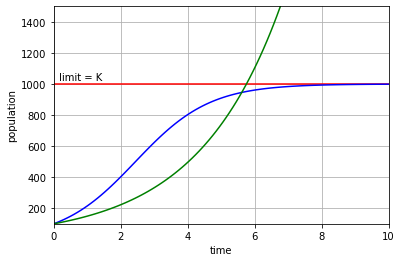

In [34]:
fig, ax = plt.subplots()

ax.plot(t, Nlog, 'b', t, Nexp, 'g')  # Nexp from earlier

ax.set_ylim(ymin=N0, ymax=1500)
ax.set_xlim(xmin=0, xmax=10)
ax.hlines(y=K, xmin=0, xmax=10, color='r')
ax.set_ylabel('population')
ax.set_xlabel('time')
ax.grid()

plt.text(0.15, K+25,'limit = K');   
# K is also called an equilibrium solution to logistic DE

### Difference equation

The difference equation for the logistic model is:

\begin{equation}
x_{n} = x_{n-1} + r x_{n-1}(1-\frac{x_{n-1}}{K})
\end{equation}


In [17]:
r = .9 # growth rate / yr
K = 1000 # carrying capacity
t = 10 # number of years
x = np.zeros(t+1)
x[0] = 100

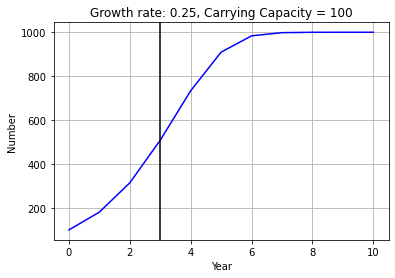

In [18]:
for i in range(t):
    x[i+1] = x[i] + r*x[i]*(1 - x[i]/K)

plt.plot(range(t+1), x, 'b' )
plt.xlabel('Year')
plt.ylabel('Number')
plt.title('Growth rate: 0.25, Carrying Capacity = 100')
plt.axvline(np.argmax(np.diff(x)),  color = 'k')
plt.grid()
plt.show()

### Can we trust models?

##### We need to verify and validate models.

---

**Dictionary definitions**: 

* Verification: checking that something works

* Validation: establishing a valid proof

**In the modeling context**:

* Verification: (calibration) is adjusting model parameters until they work for your chosen site

* Validation: is determining whether the model works for independent data sets (i.e. is predictive)


---

Reference:
    
https://www.nature.com/scitable/knowledge/library/how-populations-grow-the-exponential-and-logistic-13240157/